In [71]:
import re  # Regular expression
import pandas as pd

In [72]:
f = open('WhatsApp Chat with Army of time thieves....😎.txt', 'r', encoding ='utf-8')

In [73]:
data = f.read() #Read the file in string form

In [74]:
print(data)

5/25/21, 1:17 PM - Aaryan: <Media omitted>
5/25/21, 1:19 PM - Aaryan: <Media omitted>
5/25/21, 1:24 PM - Aaryan: <Media omitted>
5/25/21, 1:27 PM - Amit singh: <Media omitted>
5/25/21, 1:27 PM - Amit singh: <Media omitted>
5/25/21, 1:27 PM - Amit singh: <Media omitted>
5/25/21, 1:27 PM - Amit singh: <Media omitted>
5/25/21, 1:27 PM - Amit singh: 20 ka c
5/25/21, 1:27 PM - Amit singh: 21 ka b
5/25/21, 1:27 PM - Amit singh: 23 ka b
5/25/21, 1:27 PM - Amit singh: 22 ka d
5/25/21, 1:27 PM - Amit singh: 24 ka e
5/25/21, 1:27 PM - Amit singh: 26 ka A
5/25/21, 1:27 PM - Amit singh: 27 ka  c
5/25/21, 1:27 PM - Amit singh: 28 ka A
5/25/21, 1:27 PM - Amit singh: 29 ka b
5/25/21, 1:27 PM - Amit singh: 30 ka c
5/25/21, 1:27 PM - Aaryan: <Media omitted>
5/25/21, 1:28 PM - Amit singh: 20 ka c
5/25/21, 1:28 PM - Amit singh: 21 ka b
5/25/21, 1:28 PM - Amit singh: 23 ka b
5/25/21, 1:28 PM - Amit singh: 22 ka d
5/25/21, 1:28 PM - Amit singh: 24 ka e
5/25/21, 1:28 PM - Amit singh: 26 ka A
5/25/21, 1:28 P

In [75]:
print(type(data))

<class 'str'>


In [76]:
pattern = '\d{1,2}\/\d{2,4}\/\d{2,4},\s\d{1,2}:\d{1,2}\s\w{1,2}\s-\s'

In [77]:
messages = re.split(pattern, data)[1:]
len(messages)

25738

In [78]:
dates = re.findall(pattern, data)
dates

['5/25/21, 1:17 PM - ',
 '5/25/21, 1:19 PM - ',
 '5/25/21, 1:24 PM - ',
 '5/25/21, 1:27 PM - ',
 '5/25/21, 1:27 PM - ',
 '5/25/21, 1:27 PM - ',
 '5/25/21, 1:27 PM - ',
 '5/25/21, 1:27 PM - ',
 '5/25/21, 1:27 PM - ',
 '5/25/21, 1:27 PM - ',
 '5/25/21, 1:27 PM - ',
 '5/25/21, 1:27 PM - ',
 '5/25/21, 1:27 PM - ',
 '5/25/21, 1:27 PM - ',
 '5/25/21, 1:27 PM - ',
 '5/25/21, 1:27 PM - ',
 '5/25/21, 1:27 PM - ',
 '5/25/21, 1:27 PM - ',
 '5/25/21, 1:28 PM - ',
 '5/25/21, 1:28 PM - ',
 '5/25/21, 1:28 PM - ',
 '5/25/21, 1:28 PM - ',
 '5/25/21, 1:28 PM - ',
 '5/25/21, 1:28 PM - ',
 '5/25/21, 1:28 PM - ',
 '5/25/21, 1:28 PM - ',
 '5/25/21, 1:28 PM - ',
 '5/25/21, 1:28 PM - ',
 '5/25/21, 1:29 PM - ',
 '5/25/21, 1:30 PM - ',
 '5/25/21, 2:53 PM - ',
 '5/25/21, 2:53 PM - ',
 '5/25/21, 2:56 PM - ',
 '5/25/21, 2:58 PM - ',
 '5/25/21, 2:58 PM - ',
 '5/25/21, 2:59 PM - ',
 '5/25/21, 3:00 PM - ',
 '5/25/21, 3:03 PM - ',
 '5/25/21, 3:09 PM - ',
 '5/25/21, 3:13 PM - ',
 '5/25/21, 3:22 PM - ',
 '5/25/21, 3:22 

In [67]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})

ValueError: All arrays must be of the same length

In [ ]:
df

In [70]:
# conver message_datatype
df['message_date'] = pd.to_datetime(df['message_date'], format = '%m/%d/%y, %H:%M %p - ')

df.rename(columns = {'message_date': 'date'}, inplace = True)

df.head()

KeyError: 'message_date'

In [12]:
df.shape

(25738, 2)

In [13]:
# Separate users and mesaages
users = []
messages1 = []
for messages in df['user_message']:
    entry = re.split('([\w\W]+?):\s', messages)
    if entry[1:]: #User Name
        users.append(entry[1])
        messages1.append(entry[2])
    else:
        users.append('group_notification')
        messages1.append(entry[0])
        
df['user'] = users
df['message'] = messages1
df.drop(columns = ['user_message'], inplace = True)

df.head()

,date,user,message
0,2021-05-25 01:17:00,Aaryan,<Media omitted>\n
1,2021-05-25 01:19:00,Aaryan,<Media omitted>\n
2,2021-05-25 01:24:00,Aaryan,<Media omitted>\n
3,2021-05-25 01:27:00,Amit singh,<Media omitted>\n
4,2021-05-25 01:27:00,Amit singh,<Media omitted>\n


In [14]:
# Extracting Year, month, day from df['date'] column
df['year'] = df['date'].dt.year

In [15]:
df['month'] = df['date'].dt.month_name()

In [16]:
df['day'] = df['date'].dt.day

In [17]:
df

,date,user,message,year,month,day
0,2021-05-25 01:17:00,Aaryan,<Media omitted>\n,2021,May,25
1,2021-05-25 01:19:00,Aaryan,<Media omitted>\n,2021,May,25
2,2021-05-25 01:24:00,Aaryan,<Media omitted>\n,2021,May,25
3,2021-05-25 01:27:00,Amit singh,<Media omitted>\n,2021,May,25
4,2021-05-25 01:27:00,Amit singh,<Media omitted>\n,2021,May,25
...,...,...,...,...,...,...
25733,2022-11-30 10:36:00,Deepak CS,Kon bola\n,2022,November,30
25734,2022-11-30 10:36:00,Aaryan,Anirudh le aaya\n,2022,November,30
25735,2022-11-30 10:36:00,Deepak CS,Achha\n,2022,November,30
25736,2022-11-30 10:36:00,Deepak CS,Saturday ko jaunga\n,2022,November,30


In [18]:
# Extracting time(hour & min) from df['date']
df['hour'] = df['date'].dt.hour

In [19]:
df['minute'] = df['date'].dt.minute

In [20]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2021-05-25 01:17:00,Aaryan,<Media omitted>\n,2021,May,25,1,17
1,2021-05-25 01:19:00,Aaryan,<Media omitted>\n,2021,May,25,1,19
2,2021-05-25 01:24:00,Aaryan,<Media omitted>\n,2021,May,25,1,24
3,2021-05-25 01:27:00,Amit singh,<Media omitted>\n,2021,May,25,1,27
4,2021-05-25 01:27:00,Amit singh,<Media omitted>\n,2021,May,25,1,27


In [21]:
df[df['user'] == 'Ajay Kumar']

,date,user,message,year,month,day,hour,minute
28,2021-05-25 01:29:00,Ajay Kumar,D hai\n,2021,May,25,1,29
71,2021-05-25 10:00:00,Ajay Kumar,Wtf🙂\n,2021,May,25,10,0
75,2021-05-25 10:02:00,Ajay Kumar,😅😅\n,2021,May,25,10,2
94,2021-05-26 01:43:00,Ajay Kumar,Wow\n,2021,May,26,1,43
155,2021-05-26 08:37:00,Ajay Kumar,<Media omitted>\n,2021,May,26,8,37
...,...,...,...,...,...,...,...,...
23909,2022-07-21 08:03:00,Ajay Kumar,Ohh ho\n,2022,July,21,8,3
23910,2022-07-21 08:04:00,Ajay Kumar,Kahan @919012806899\n,2022,July,21,8,4
23942,2022-07-31 08:50:00,Ajay Kumar,Happy Birthday @918077120489\n,2022,July,31,8,50
24029,2022-08-12 08:01:00,Ajay Kumar,😅\n,2022,August,12,8,1


In [22]:
df[df['user'] == 'Ajay Kumar'].shape[0]

474

In [23]:
# Counting number of words
words = []

for message in df['message']:
    words.extend(message.split())

In [24]:
len(words)

125120

In [25]:
df

,date,user,message,year,month,day,hour,minute
0,2021-05-25 01:17:00,Aaryan,<Media omitted>\n,2021,May,25,1,17
1,2021-05-25 01:19:00,Aaryan,<Media omitted>\n,2021,May,25,1,19
2,2021-05-25 01:24:00,Aaryan,<Media omitted>\n,2021,May,25,1,24
3,2021-05-25 01:27:00,Amit singh,<Media omitted>\n,2021,May,25,1,27
4,2021-05-25 01:27:00,Amit singh,<Media omitted>\n,2021,May,25,1,27
...,...,...,...,...,...,...,...,...
25733,2022-11-30 10:36:00,Deepak CS,Kon bola\n,2022,November,30,10,36
25734,2022-11-30 10:36:00,Aaryan,Anirudh le aaya\n,2022,November,30,10,36
25735,2022-11-30 10:36:00,Deepak CS,Achha\n,2022,November,30,10,36
25736,2022-11-30 10:36:00,Deepak CS,Saturday ko jaunga\n,2022,November,30,10,36


In [26]:
# calculating number of media messages shared
df[df['message'] == '<Media omitted>\n'].shape[0]

2646

In [27]:
# we the help of the urlextract library we give them a string and the object
# will return all the links in the form of list.

from urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls('we the help https://www.google.com/ of the urlextract https://github.com/jupyterhub/jupyterhub/issues/408 library we give them a string and the object')
urls

['https://www.google.com/',
 'https://github.com/jupyterhub/jupyterhub/issues/408']

In [28]:
y = []
for message in df['message']:
    y.extend(extractor.find_urls(message))

In [29]:
len(y)

426

In [30]:
df

,date,user,message,year,month,day,hour,minute
0,2021-05-25 01:17:00,Aaryan,<Media omitted>\n,2021,May,25,1,17
1,2021-05-25 01:19:00,Aaryan,<Media omitted>\n,2021,May,25,1,19
2,2021-05-25 01:24:00,Aaryan,<Media omitted>\n,2021,May,25,1,24
3,2021-05-25 01:27:00,Amit singh,<Media omitted>\n,2021,May,25,1,27
4,2021-05-25 01:27:00,Amit singh,<Media omitted>\n,2021,May,25,1,27
...,...,...,...,...,...,...,...,...
25733,2022-11-30 10:36:00,Deepak CS,Kon bola\n,2022,November,30,10,36
25734,2022-11-30 10:36:00,Aaryan,Anirudh le aaya\n,2022,November,30,10,36
25735,2022-11-30 10:36:00,Deepak CS,Achha\n,2022,November,30,10,36
25736,2022-11-30 10:36:00,Deepak CS,Saturday ko jaunga\n,2022,November,30,10,36


In [31]:
# Top 5 busiest guy in group
x =df['user'].value_counts().head()

In [32]:
import matplotlib.pyplot as plt

In [33]:
name = x.index
count = x.values

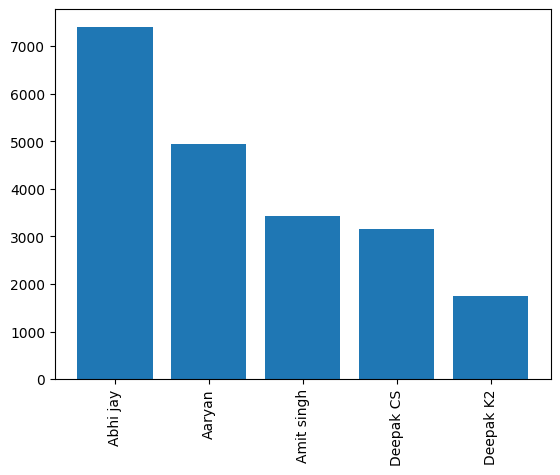

In [34]:
plt.bar(name, count)
plt.xticks(rotation = 'vertical')
plt.show()

In [35]:
round((df['user'].value_counts()/df.shape[0]) * 100,2).reset_index().rename(columns = {'index': 'name', 'user':'percent' }) # use reset_index to convert into dataframe

,name,percent
0,Abhi jay,28.78
1,Aaryan,19.19
2,Amit singh,13.35
3,Deepak CS,12.29
4,Deepak K2,6.78
5,Ayush CS,5.89
6,Arvind,4.55
7,Akshat Jindal,3.22
8,Aaquil,2.58
9,Ajay Kumar,1.84


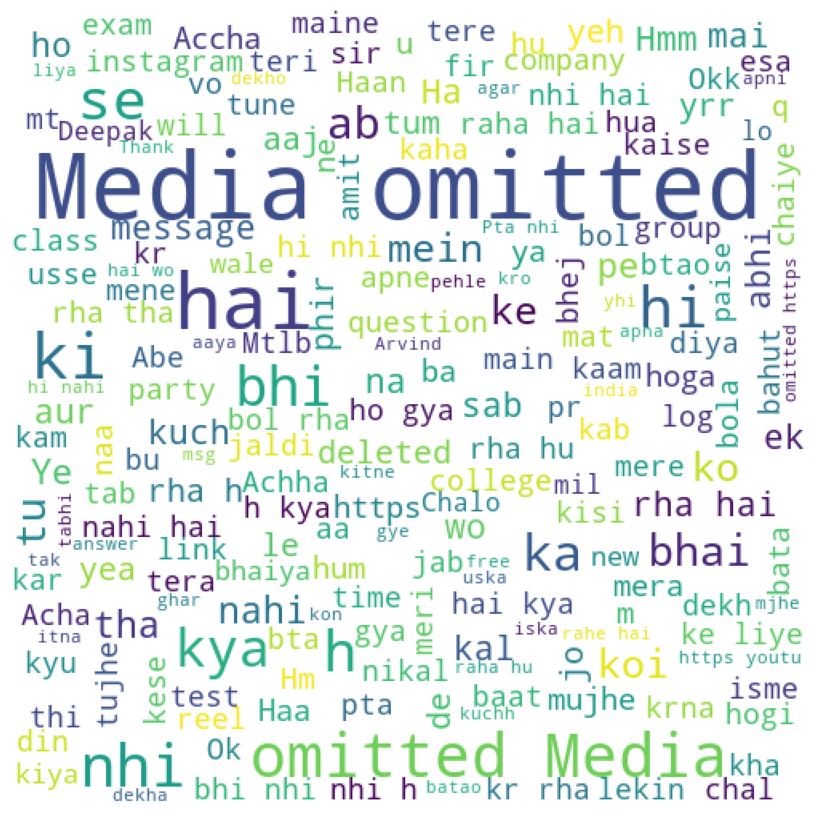

In [36]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height= 500, min_font_size=10, background_color ='white')
df_wc = wc.generate(df['message'].str.cat(sep = ' '))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(df_wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [37]:
# words = []

# for message in df['message']:
#     words.extend(message.split())

In [38]:
# Remove group notification message (who left the group or change group dp)
# Remove media omitted
# Remove Stop words

In [39]:
# Remove group notification message fitering 
temp = df[df['user'] != 'group_notification']

In [40]:
# Remove media omitted
temp = temp[temp['message'] != '<Media omitted>\n']

In [41]:
# Remove Stop words
f = open('Stop_words_hinglish.txt', 'r')
stop_words = f.read()

In [42]:
words = []

for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [43]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(10))

,0,1
0,gya,311
1,baat,287
2,message,266
3,phir,256
4,😂,238
5,deleted,236
6,yrr,229
7,bta,225
8,pta,223
9,company,188


In [44]:
import emoji

In [45]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])

In [46]:
emojis_df = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

In [47]:
print(emojis_df)

     0    1
0    😂  716
1    🤣  280
2    😃  126
3    🙏   95
4    😀   89
..  ..  ...
155  💋    1
156  🍾    1
157  🏆    1
158  ⚽    1
159  ☠    1

[160 rows x 2 columns]


C:\Users\Ajayk\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ajayk\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


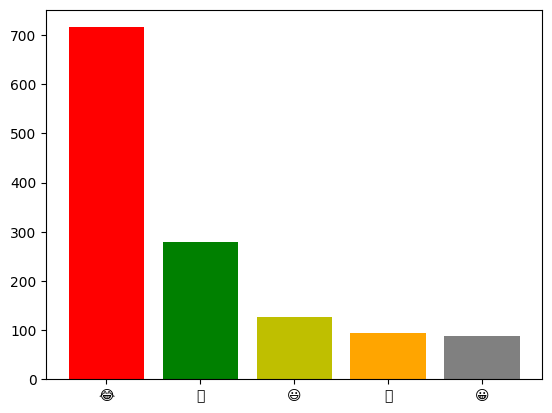

In [48]:
plt.bar(emojis_df[0].head(), emojis_df[1].head(), color = ['r','g','y','orange','grey'])
plt.show()

In [49]:
df['month_num'] = df['date'].dt.month

In [50]:
timeline=df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [51]:
timeline

,year,month_num,month,message
0,2021,5,May,671
1,2021,6,June,2490
2,2021,7,July,2938
3,2021,8,August,2419
4,2021,9,September,1173
5,2021,10,October,908
6,2021,11,November,1282
7,2021,12,December,2452
8,2022,1,January,2034
9,2022,2,February,1933


In [52]:
time = []
for i in range(timeline.shape[0]):
    time.append((timeline['month'][i] + '-' + str(timeline['year'][i])))

In [53]:
timeline['time'] = time

In [54]:
timeline

,year,month_num,month,message,time
0,2021,5,May,671,May-2021
1,2021,6,June,2490,June-2021
2,2021,7,July,2938,July-2021
3,2021,8,August,2419,August-2021
4,2021,9,September,1173,September-2021
5,2021,10,October,908,October-2021
6,2021,11,November,1282,November-2021
7,2021,12,December,2452,December-2021
8,2022,1,January,2034,January-2022
9,2022,2,February,1933,February-2022


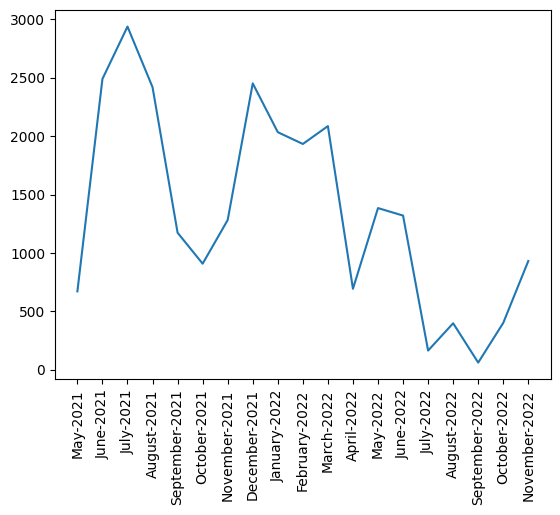

In [55]:
plt.plot(timeline['time'], timeline['message'])
plt.xticks(rotation = 'vertical')
plt.show()

In [56]:
df['only_date'] = df['date'].dt.day

In [57]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

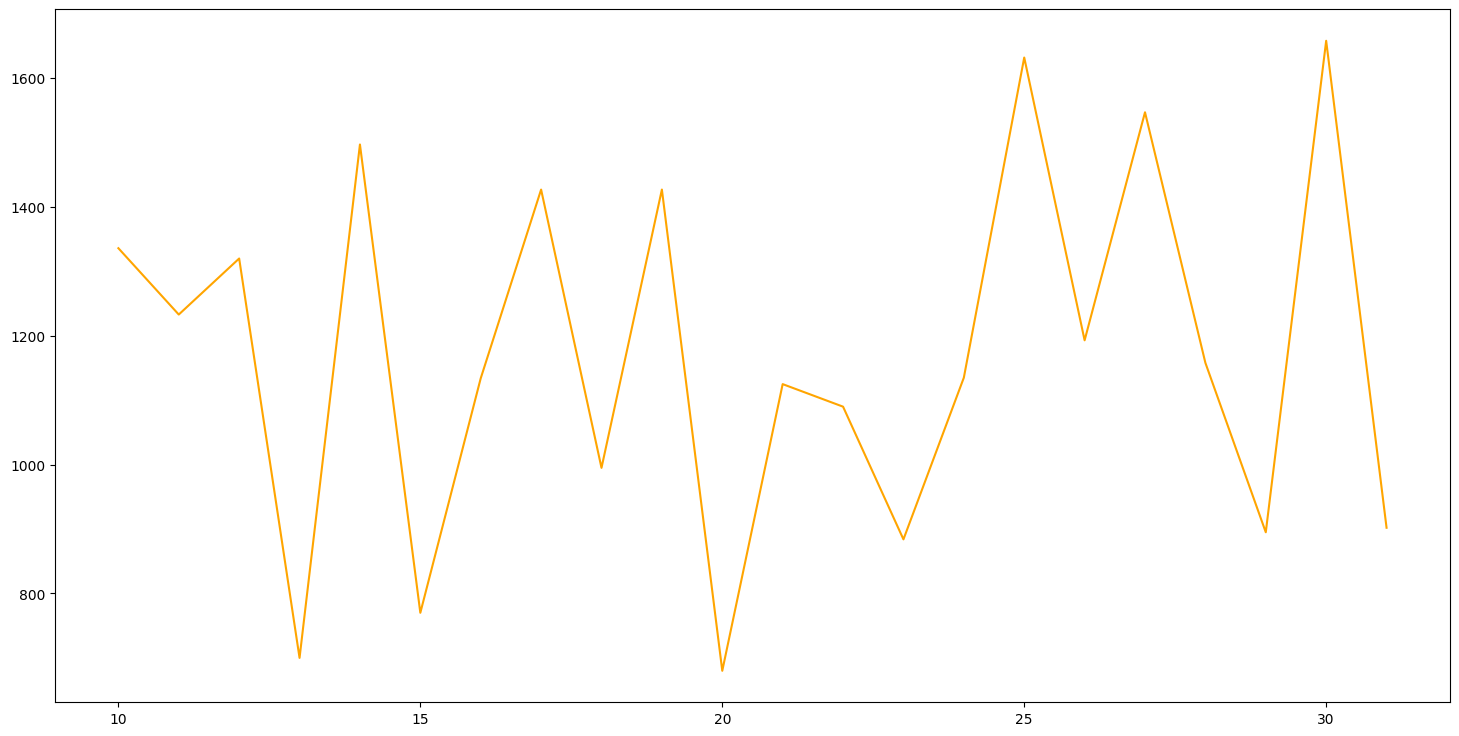

In [58]:
plt.figure(figsize = (18,9))
plt.plot(daily_timeline['only_date'], daily_timeline['message'], color= 'orange')

In [59]:
df

,date,user,message,year,month,day,hour,minute,month_num,only_date
0,2021-05-25 01:17:00,Aaryan,<Media omitted>\n,2021,May,25,1,17,5,25
1,2021-05-25 01:19:00,Aaryan,<Media omitted>\n,2021,May,25,1,19,5,25
2,2021-05-25 01:24:00,Aaryan,<Media omitted>\n,2021,May,25,1,24,5,25
3,2021-05-25 01:27:00,Amit singh,<Media omitted>\n,2021,May,25,1,27,5,25
4,2021-05-25 01:27:00,Amit singh,<Media omitted>\n,2021,May,25,1,27,5,25
...,...,...,...,...,...,...,...,...,...,...
25733,2022-11-30 10:36:00,Deepak CS,Kon bola\n,2022,November,30,10,36,11,30
25734,2022-11-30 10:36:00,Aaryan,Anirudh le aaya\n,2022,November,30,10,36,11,30
25735,2022-11-30 10:36:00,Deepak CS,Achha\n,2022,November,30,10,36,11,30
25736,2022-11-30 10:36:00,Deepak CS,Saturday ko jaunga\n,2022,November,30,10,36,11,30
